In [1]:
import pandas as pd
import operator
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('t_kjv.csv')

In [3]:
token_dict = {}

In [4]:
def get_ngram(string,n):
    token_list = string.split(' ')
    token_list = list(map(lambda x: x.lower().strip('.'),token_list))
    result = []
    for i in range(len(token_list)):
        if i < len(token_list)-n+1:
            temp = []
            for x in range(n):
                temp.append(token_list[i+x])
            result.append(tuple(temp))
    return result

In [33]:
gen_df = df[df['b']==1]

In [34]:
len(gen_df)

1533

In [39]:
for index, row in gen_df.iterrows():
    token_list = get_ngram(row['t'],3)
    for ngram in token_list:
        if ngram in token_dict:
            token_dict[ngram] += 1
        else:
            token_dict[ngram] = 1

In [40]:
len(token_dict)

26986

In [5]:
book_df_list = []
for i in range(1,67):
    book_df_list.append([df[df['b']==i],{}])

In [6]:
for book, book_dict in book_df_list:
    for index, row in book.iterrows():
        token_list = get_ngram(row['t'],3)
        for ngram in token_list:
            if ngram in token_dict:
                token_dict[ngram] += 1
            else:
                token_dict[ngram] = 1
            if ngram in book_dict:
                book_dict[ngram] += 1
            else:
                book_dict[ngram] = 1

In [7]:
len(token_dict)

422162

In [8]:
ngram_sort = sorted(token_dict.items(), key=operator.itemgetter(1))

In [9]:
ngram_sort.reverse()

In [11]:
most_ngrams = ngram_sort[0:11]

In [12]:
data_set = []
for key,value in most_ngrams:
    example_list = []
    for i in range(len(book_df_list)):
        if key in book_df_list[i][1]:
            example_list.append([i+1,book_df_list[i][1][key]])
    data_set.append([key,value,example_list])

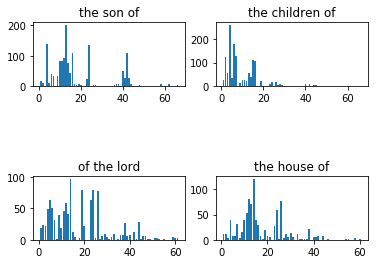

In [14]:
plt.subplot(3,2,1)
test_data_set = data_set[0]
x,y = zip(*test_data_set[2])
plt.bar(x,y)
plt.title(' '.join(test_data_set[0]))
plt.subplot(3,2,2)
test_data_set = data_set[1]
x,y = zip(*test_data_set[2])
plt.bar(x,y)
plt.title(' '.join(test_data_set[0]))
plt.subplot(3,2,5)
test_data_set = data_set[2]
x,y = zip(*test_data_set[2])
plt.bar(x,y)
plt.title(' '.join(test_data_set[0]))
plt.subplot(3,2,6)
test_data_set = data_set[3]
x,y = zip(*test_data_set[2])
plt.bar(x,y)
plt.title(' '.join(test_data_set[0]))
plt.show()

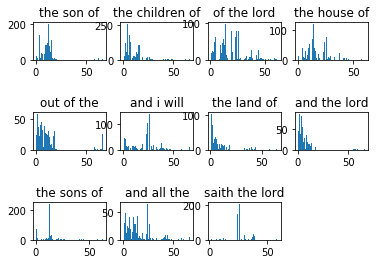

In [15]:
for i in range(len(data_set)):
    test_data_set = data_set[i]
    if i<4:
        plt.subplot(5,4,i+1)
    elif i<8:
        plt.subplot(5,4,i+5)
    else:
        plt.subplot(5,4,i+9)
    x,y = zip(*test_data_set[2])
    plt.bar(x,y)
    plt.title(' '.join(test_data_set[0]))
plt.show()

In [16]:
old_df_list = book_df_list[0:38]

In [17]:
new_df_list = book_df_list[39:]

In [18]:
old_test_token = {}

In [19]:
new_test_token = {}

In [20]:
for book_df, book_dict in old_df_list:
    for i in book_dict:
        if i in old_test_token:
            old_test_token[i] += book_dict[i]
        else:
            old_test_token[i] = book_dict[i]
for book_df, book_dict in new_df_list:
    for i in book_dict:
        if i in new_test_token:
            new_test_token[i] += book_dict[i]
        else:
            new_test_token[i] = book_dict[i]

In [21]:
ngram_sort_old = sorted(old_test_token.items(), key=operator.itemgetter(1))

In [22]:
ngram_sort_new = sorted(new_test_token.items(), key=operator.itemgetter(1))

In [23]:
ngram_sort_old.reverse()
ngram_sort_new.reverse()